In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2> Loading the data </h2>

In [3]:
train_data = pd.read_csv('../input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv('../input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h2><b><u>Exploratory Data Analysis </u></b>

**<h3>Check whether there are any missing values present in the data** </h3>

<AxesSubplot:>

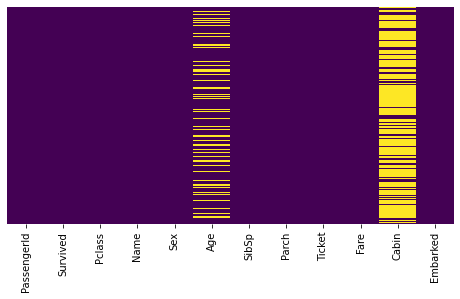

In [5]:
plt.figure(figsize=(8,4))
sns.heatmap(train_data.isna(), cmap='viridis', yticklabels=False, cbar=False) # heatmap for showing missing values

* From the above heatmap we can see that there are missing values present in the feature Age, Cabin

<h3><b> The number of people survived and deceased </b> </h3>

<AxesSubplot:xlabel='Survived', ylabel='count'>

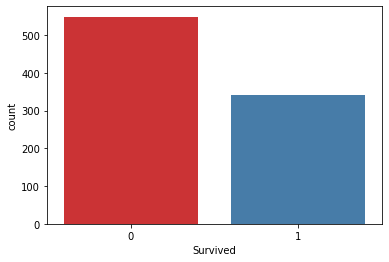

In [6]:
sns.countplot(x='Survived',data=train_data, palette= 'Set1')
# 1 -> passenger survived
# 0 -> passenger deceased

<AxesSubplot:xlabel='Survived', ylabel='count'>

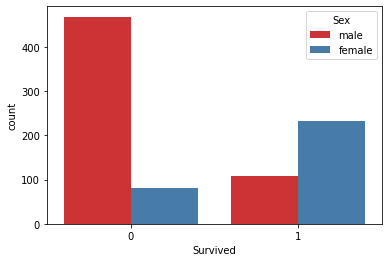

In [7]:
sns.countplot(x='Survived', hue='Sex', data=train_data, palette='Set1')

# from this plot, it's visible that many males were survied and many female died

<AxesSubplot:xlabel='Survived', ylabel='count'>

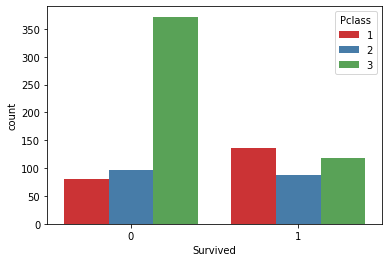

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=train_data, palette= 'Set1')
# here we observe that passengers in class 3 were mostly survived as compared to other classes in Titanic

<h3><b> Age Distribution of the passengers in titanic </b> </h3>

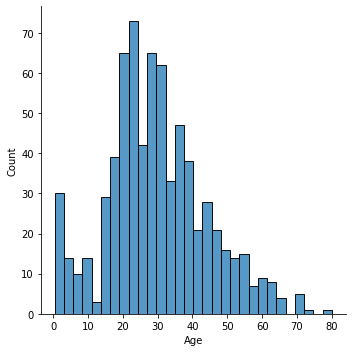

In [9]:
sns.displot(train_data['Age'].dropna(), bins=30)

<h3><b> Distribution of Fare amount in Titanic </b> </h3>

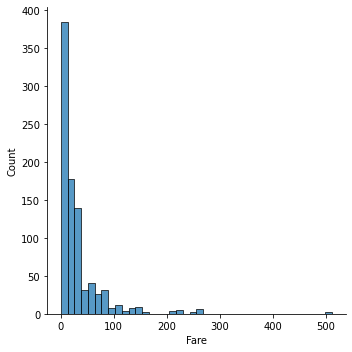

In [10]:
sns.displot(train_data['Fare'], bins=40)

<h2><b><u>Handling Missing Values </u> </b> </h2>

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

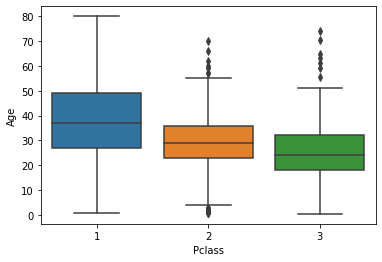

In [11]:
sns.boxplot(x='Pclass', y='Age', data=train_data)

* We see that wealthier people of class 1, class 2 are tend to be old as compared to the class 3 people
* Which indicates that older people are tend to be rich and chose either of Class 1 & 2
* Whereas younger people chose class 3

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isna(Age):
        if Pclass == 1:     # from the boxplot we are taking meadian values from the Pclass
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age, axis=1)
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age, axis=1)

In [14]:
train_data.drop('Cabin',axis=1, inplace= True) # this feature is categorical andf doesn't help as feature for predictions
test_data.drop('Cabin',axis=1, inplace= True)

<AxesSubplot:>

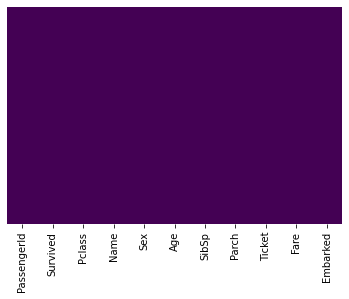

In [15]:
sns.heatmap(train_data.isna(),cmap='viridis', yticklabels=False, cbar=False)
# me made sure that there are no missing values present in the Age column

<h2><b><u>Creating dummy variable of categorical variables </u> </b> </h2>

In [16]:
sex= pd.get_dummies(train_data['Sex'], drop_first=True)
embark = pd.get_dummies(train_data['Embarked'], drop_first=True)

train_data = pd.concat([train_data, sex, embark], axis=1)
train_data.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace= True)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [17]:
sex= pd.get_dummies(test_data['Sex'], drop_first=True)
embark = pd.get_dummies(test_data['Embarked'], drop_first=True)

test_data = pd.concat([test_data, sex, embark], axis=1)
test_data.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace= True)
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [18]:
mean = test_data['Fare'].mean()
test_data['Fare'].fillna(mean, inplace= True)

In [19]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

<h2><b><u> Training and Prediciting the model </u> </b> </h2>

In [20]:
X_train = train_data.drop(['Survived','PassengerId'],axis=1)
X_test = test_data.drop('PassengerId', axis=1)

In [21]:
y_train = train_data['Survived']

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)  # initializing the model

In [23]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [24]:
prediction = model.predict(X_test)

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
ada = AdaBoostClassifier()

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=ada, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.811823 using {'learning_rate': 1.0, 'n_estimators': 100}


In [26]:
import xgboost as xgb
gbm = xgb.XGBClassifier(learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 nthread= -1,
 scale_pos_weight=1).fit(X_train, y_train)
xgb_predictions = gbm.predict(X_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:46:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': xgb_predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
